# Distribution Analysis of Facies

### In this section, we display all of facies of stone in every well to analyze

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read Data
filename = r'001_Data_TA_7_Well_New.csv'
df = pd.read_csv(filename)
df.head()
# Ubah Spesifikasi Tipe Data
df['Formation'] = df['Formation'].astype('category')
df['Well Name'] = df['Well Name'].astype('category')
# Check Jumlah Well
df['Well Name'].unique()
# Check Jumlah Facies
df['Facies'].unique()
# Check NaN Values in dataset
df.isna().sum()

Facies          0
Formation       0
Well Name       0
Depth           0
GR              0
ILD_log10       0
DeltaPHI        0
PHIND           0
PE              0
NM_M            0
RELPOS          0
GR_clipped      0
GR_median_7     0
GR_median_9     0
GR_median_11    0
GR_median_15    0
dtype: int64

### Preprocessing 1

In [3]:
# Pre-Processing 1
def pre_pro(source):
    # Melakukan sorting data log berdasarkan Depth
    data = source.sort_values(by=['Depth'])
    # Rename header of Induction Log Deep 'ILD'
    data = source.rename({'ILD_log10': 'ILD'}, axis=1)
    # to get column names in Pandas Dataframe
    colm = list(data.columns)
    # Ubah rentangan nilai ILD log dari nilai logaritmic ke nilai linier
    data['ILD'] = 10**data['ILD']
    return data
data = pre_pro(df)
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD,DeltaPHI,PHIND,PE,NM_M,RELPOS,GR_clipped,GR_median_7,GR_median_9,GR_median_11,GR_median_15
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,4.613176,9.9,11.915,4.6,1,1.000,77.45,77.45,77.45,77.45,77.45
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,4.581419,14.2,12.565,4.1,1,0.979,78.26,77.45,77.45,77.45,77.45
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,4.549881,14.8,13.050,3.6,1,0.957,79.05,77.45,77.45,77.45,77.45
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,4.518559,13.9,13.115,3.5,1,0.936,86.10,77.45,77.45,77.45,77.45
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,4.436086,13.5,13.300,3.4,1,0.915,74.58,75.65,75.65,76.89,76.89


In [4]:
#Membuat library Labelling pada tiap facies untuk warna dan Label nya
facies_colors = ['#F4D03F','#F5B041','#DC7633','#6E2C00','#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']
facies_labels = ['SS','CSiS','FSiS','SiSh','MS','WS','D','PS','BS']

#facies_color_map adalah kamus untuk memetakan facies labels ke warnanya masing-masing
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]

data.loc[:,'Facies_Labels'] = data.apply(lambda row: label_facies(row, facies_labels), axis=1)

data.head()

,Facies,Formation,Well Name,Depth,GR,ILD,DeltaPHI,PHIND,PE,NM_M,RELPOS,GR_clipped,GR_median_7,GR_median_9,GR_median_11,GR_median_15,Facies_Labels
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,4.613176,9.9,11.915,4.6,1,1.000,77.45,77.45,77.45,77.45,77.45,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,4.581419,14.2,12.565,4.1,1,0.979,78.26,77.45,77.45,77.45,77.45,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,4.549881,14.8,13.050,3.6,1,0.957,79.05,77.45,77.45,77.45,77.45,FSiS
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,4.518559,13.9,13.115,3.5,1,0.936,86.10,77.45,77.45,77.45,77.45,FSiS
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,4.436086,13.5,13.300,3.4,1,0.915,74.58,75.65,75.65,76.89,76.89,FSiS


In [5]:
# Define Well to Recall
df1 = data[data['Well Name']=='SHRIMPLIN']
df2 = data[data['Well Name']=='SHANKLE']
df3 = data[data['Well Name']=='LUKE G U']
df4 = data[data['Well Name']=='CROSS H CATTLE']
df5 = data[data['Well Name']=='NOLAN']
df6 = data[data['Well Name']=='NEWBY']
df7 = data[data['Well Name']=='CHURCHMAN BIBLE']

## Well 1

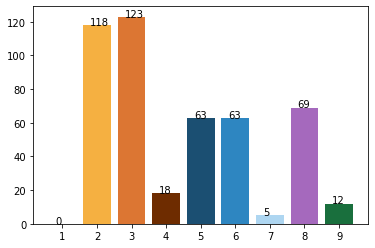

In [6]:
# Well 1
Fac = data['Facies']
Nfac = sorted(list(dict.fromkeys(Fac)))
# Bar Plot
b = []
for i in range(len(Nfac)):
    b.append(len(np.where(df1['Facies']==i+1)[0]))
plt.bar(sorted(Nfac),b, color=facies_colors)
plt.xticks(sorted(Nfac))
for i, v in enumerate(b):
    plt.text(i+0.8, v, b[i], fontsize=10)
plt.savefig("distri_df1.png")

## Well 2

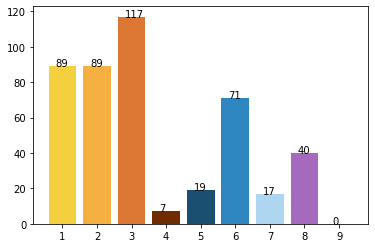

In [7]:
# Well 2
Fac = data['Facies']
Nfac = sorted(list(dict.fromkeys(Fac)))
# Bar Plot
b = []
for i in range(len(Nfac)):
    b.append(len(np.where(df2['Facies']==i+1)[0]))
plt.bar(sorted(Nfac),b, color=facies_colors)
plt.xticks(sorted(Nfac))
for i, v in enumerate(b):
    plt.text(i+0.8, v, b[i], fontsize=10)
plt.savefig("distri_df2.png")

## Well 3

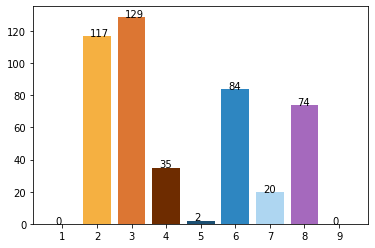

In [8]:
# Well 3
Fac = data['Facies']
Nfac = sorted(list(dict.fromkeys(Fac)))
# Bar Plot
b = []
for i in range(len(Nfac)):
    b.append(len(np.where(df3['Facies']==i+1)[0]))
plt.bar(sorted(Nfac),b, color=facies_colors)
plt.xticks(sorted(Nfac))
for i, v in enumerate(b):
    plt.text(i+0.8, v, b[i], fontsize=10)
plt.savefig("distri_df3.png")

## Well 4

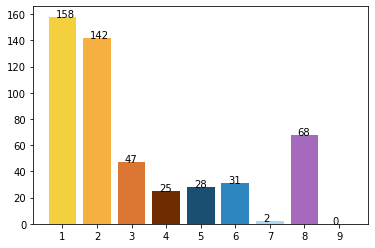

In [9]:
# Well 4
Fac = data['Facies']
Nfac = sorted(list(dict.fromkeys(Fac)))
# Bar Plot
b = []
for i in range(len(Nfac)):
    b.append(len(np.where(df4['Facies']==i+1)[0]))
plt.bar(sorted(Nfac),b, color=facies_colors)
plt.xticks(sorted(Nfac))
for i, v in enumerate(b):
    plt.text(i+0.8, v, b[i], fontsize=10)
plt.savefig("distri_df4.png")

## Well 5

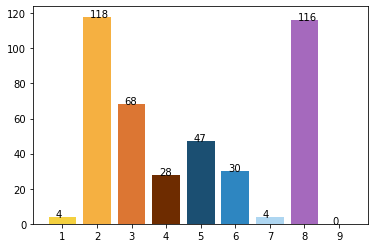

In [10]:
# Well 5
Fac = data['Facies']
Nfac = sorted(list(dict.fromkeys(Fac)))
# Bar Plot
b = []
for i in range(len(Nfac)):
    b.append(len(np.where(df5['Facies']==i+1)[0]))
plt.bar(sorted(Nfac),b, color=facies_colors)
plt.xticks(sorted(Nfac))
for i, v in enumerate(b):
    plt.text(i+0.8, v, b[i], fontsize=10)
plt.savefig("distri_df5.png")

## Well 6

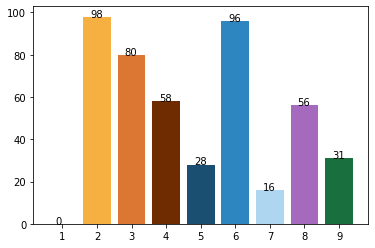

In [11]:
# Well 6
Fac = data['Facies']
Nfac = sorted(list(dict.fromkeys(Fac)))
# Bar Plot
b = []
for i in range(len(Nfac)):
    b.append(len(np.where(df6['Facies']==i+1)[0]))
plt.bar(sorted(Nfac),b, color=facies_colors)
plt.xticks(sorted(Nfac))
for i, v in enumerate(b):
    plt.text(i+0.8, v, b[i], fontsize=10)
plt.savefig("distri_df6.png")

## Well 7

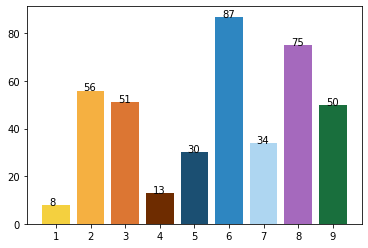

In [12]:
# Well 7
Fac = data['Facies']
Nfac = sorted(list(dict.fromkeys(Fac)))
# Bar Plot
b = []
for i in range(len(Nfac)):
    b.append(len(np.where(df7['Facies']==i+1)[0]))
plt.bar(sorted(Nfac),b, color=facies_colors)
plt.xticks(sorted(Nfac))
for i, v in enumerate(b):
    plt.text(i+0.8, v, b[i], fontsize=10)
plt.savefig("distri_df7.png")

## All of Wells

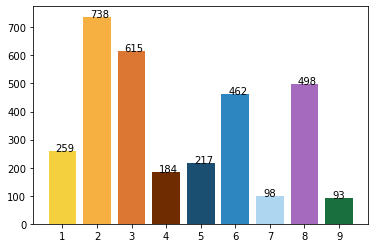

In [13]:
# Seluruh Well
Fac = data['Facies']
Nfac = sorted(list(dict.fromkeys(Fac)))
# Bar Plot
b = []
for i in range(len(Nfac)):
    b.append(len(np.where(data['Facies']==i+1)[0]))
plt.bar(sorted(Nfac),b, color=facies_colors)
plt.xticks(sorted(Nfac))
for i, v in enumerate(b):
    plt.text(i+0.8, v, b[i], fontsize=10)
plt.savefig("distri_seluruh_data.png")

## Correlation of All Wells

In [14]:
# Correlation for all wells
data.corr
# Correlation for Train and Blind Test Data
data_training = data
blind = data_training[data_training['Well Name'] == 'NEWBY']
data_training = data_training[data_training['Well Name'] != 'NEWBY']
data_training.corr()
blind.corr()

,Facies,Depth,GR,ILD,DeltaPHI,PHIND,PE,NM_M,RELPOS,GR_clipped,GR_median_7,GR_median_9,GR_median_11,GR_median_15
Facies,1.000000,0.178839,-0.323301,0.326977,-0.592575,-0.376115,0.731430,0.816071,0.139787,-0.456506,-0.337355,-0.348059,-0.368371,-0.405528
Depth,0.178839,1.000000,0.107451,0.293297,-0.032635,-0.034674,0.314198,0.115733,-0.002269,0.085689,0.115261,0.109031,0.102242,0.098071
GR,-0.323301,0.107451,1.000000,-0.165006,0.321767,0.218145,-0.279662,-0.209391,-0.271751,0.931306,0.993549,0.986129,0.973778,0.941266
ILD,0.326977,0.293297,-0.165006,1.000000,-0.287724,-0.638960,0.410955,0.413499,0.197013,-0.197332,-0.167699,-0.173697,-0.183623,-0.184011
DeltaPHI,-0.592575,-0.032635,0.321767,-0.287724,1.000000,0.279230,-0.531669,-0.448028,0.062015,0.424576,0.332392,0.339263,0.355127,0.395361
PHIND,-0.376115,-0.034674,0.218145,-0.638960,0.279230,1.000000,-0.431090,-0.451161,-0.102785,0.351777,0.223780,0.226108,0.242413,0.255057
PE,0.731430,0.314198,-0.279662,0.410955,-0.531669,-0.431090,1.000000,0.588078,0.120626,-0.414895,-0.297704,-0.310693,-0.337331,-0.374961
NM_M,0.816071,0.115733,-0.209391,0.413499,-0.448028,-0.451161,0.588078,1.000000,0.026933,-0.321044,-0.224316,-0.236853,-0.255363,-0.286497
RELPOS,0.139787,-0.002269,-0.271751,0.197013,0.062015,-0.102785,0.120626,0.026933,1.000000,-0.265636,-0.280401,-0.279517,-0.276363,-0.263478
GR_clipped,-0.456506,0.085689,0.931306,-0.197332,0.424576,0.351777,-0.414895,-0.321044,-0.265636,1.000000,0.943133,0.941022,0.947920,0.956552
